In [1]:
import numpy as np
import matplotlib.pyplot as plt

##1.1:  Basic Array Operations[5 marks]
1.  Create a NumPy array with values from 0 to 10, reshape it into a 5×2 matrix, and printit.
2.  Generate an array of 50 random numbers between 1 and 100.
3.  Create an identity matrix of size 3×3 and multiply it by 2.
4.  GivenX=np.array([1, 2, 3, 4, 5]), compute:•Mean, median, variance, and standard deviation.
5.  Compute the dot product of two vectors:a= [1,2,3] andb= [4,5,6].

In [2]:
a = np.array(range(0,11))
print(a)
a.shape
#If the array has the numbers from 0 to 10 including 10 it has 11 values and cant be reshaped into a 5x2 matrix

[ 0  1  2  3  4  5  6  7  8  9 10]


(11,)

In [3]:
#if the array is exclusive then it will work
a_new = np.arange(10)
a_new.reshape(5,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [4]:
b = np.random.randint(1,100,50)
b

array([ 7,  9, 24, 84, 89,  2, 74, 52, 96, 87, 85, 82, 42, 66, 40,  5, 50,
       10, 10, 20, 17, 79, 50, 58, 28,  6, 72, 25, 80,  3, 33, 87, 90, 46,
       50, 76, 79, 58, 93, 22,  4, 61,  2, 79, 98,  6, 78, 65, 59, 11])

In [5]:
im = np.identity(3)
print(im)
print()
print(im * 2)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]


In [6]:
c = np.array([1,2,3,4,5])
print(c.mean())
print(np.median(c))
print(c.var())
print(c.std())

3.0
3.0
2.0
1.4142135623730951


In [7]:
d= np.array([1,2,3])
e= np.array([4,5,6])
print(np.dot(d,e))
print(d*e)

32
[ 4 10 18]


1.2:  Working with Data (Loading and Preprocessing)[5 marks]
1.  Generate a dataset of 100 samples where:
  - X is a random feature between 1 and 10.
  - y= 3X+ noise (where noise is a small random value).
2.  Convert the dataset into a NumPy array and reshape X into a column vector of shape(100,1).
3.  Normalize X so that it has a mean of 0 and a standard deviation of 1.
4.  Split the dataset into training (80%) and testing (20%) using NumPy.
5.  Compute the correlation coefficient between X and y to check if there is a linear relationship.

In [8]:
import numpy as np
import pandas as pd

# Set a seed for reproducibility
np.random.seed(42)

# Generate 100 samples
num_samples = 100

# Generate random feature X between 1 and 10
X = np.random.uniform(1, 10, num_samples)

# Generate noise (small random values)
noise = np.random.normal(0, 2, num_samples)  # Mean 0, standard deviation 2

# Generate y = 3X + noise
y = 3 * X + noise

# Create a Pandas DataFrame to store the dataset
data = pd.DataFrame({'X': X, 'y': y})

# Print the first 5 rows of the dataset
print(data.head())

# Optionally, you can save the dataset to a CSV file
# data.to_csv('generated_dataset.csv', index=False)

          X          y
0  4.370861  13.286677
1  9.556429  28.071272
2  7.587945  22.947358
3  6.387926  15.188641
4  2.404168   6.773160


In [9]:
X_arr = np.array(data["X"])
Xarr = X_arr.reshape(100,1)
Xarr.shape

(100, 1)

In [11]:
Xmean = Xarr.mean()
Xsd = Xarr.std()

X_normalised = (Xarr - Xmean)/Xsd


5.231626690403885


In [7]:
Y_arr = np.array(data["y"]).reshape(100,1)

In [8]:
split_index = int(.8 * num_samples)

# Split the dataset into training and testing sets
X_train = X_normalised[:split_index]
X_test = X_normalised[split_index:]
y_train = Y_arr[:split_index]
y_test = Y_arr[split_index:]

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80, 1)
X_test shape: (20, 1)
y_train shape: (80, 1)
y_test shape: (20, 1)


In [9]:
# Calculate the correlation coefficient
#np.corrcoef expects 1D arrays as input. Therefore, we use .flatten() to convert the reshaped X_normalized and y_reshaped (which are 2D column vectors) into 1D arrays.
correlation_coefficient = np.corrcoef(X_normalised.flatten(),Y_arr.flatten())[0, 1]

# Print the correlation coefficient
print("Correlation Coefficient between X and y:", correlation_coefficient)

Correlation Coefficient between X and y: 0.9739827967956117


1.3:  Visualizing Data with Matplotlib[5 marks]
1.  Plot a scatter plot of X vs.y.
2.  Add a title, labels, and adjust the size of data points.
3.  Plot a histogram of y to understand the distribution.
4.  Generate and plot two different trend lines:
- y= 2X+ 5
- y= 4X−35.
- Visualize the data distribution using a boxplot.

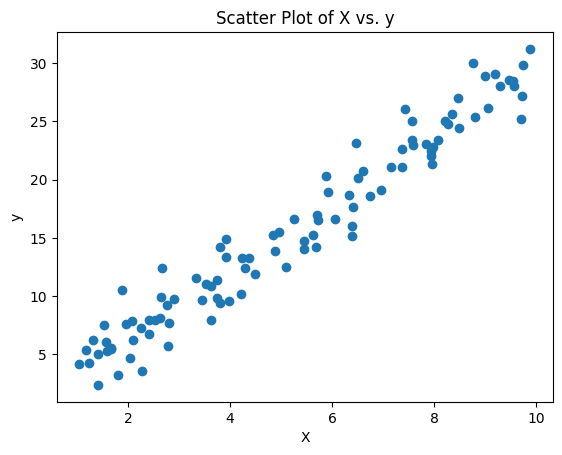

In [ ]:
plt.scatter(data['X'], data['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of X vs. y')
plt.show()

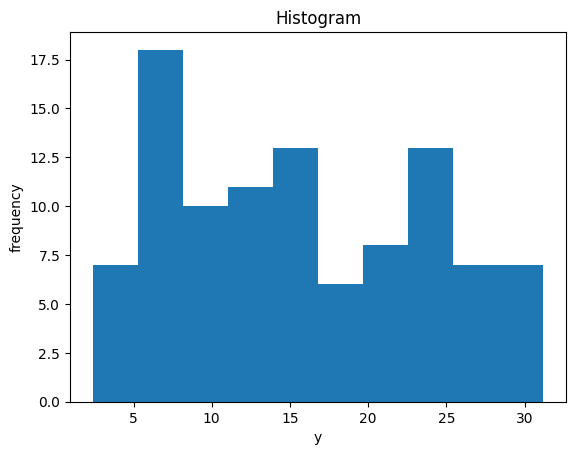

In [ ]:
plt.hist(data["y"])
plt.xlabel('y')
plt.ylabel('frequency')
plt.title('Histogram')
plt.show()

In [7]:
# Generate trend line data
x_range = np.linspace(min(X), max(X), 100)  # Range of x values for plotting trend lines
y_trend1 = 2 * x_range + 5
y_trend2 = 4 * x_range - 35

# Plot scatter plot and trend lines
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['y'], label='Data Points')
plt.plot(x_range, y_trend1, color='red', label='y = 2X + 5')
plt.plot(x_range, y_trend2, color='green', label='y = 4X - 35')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot with Trend Lines')
plt.legend()
plt.show()

NameError: name 'X' is not defined

##2.1:  Construct the Functions using NumPy[5 Marks]


In [ ]:
x = np.linspace(0,10,200)
x.shape

(200,)

In [ ]:
fx_1 = np.log(1+np.exp(x))
fx_1

array([ 0.69314718,  0.71858842,  0.7446605 ,  0.77136222,  0.79869159,
        0.82664587,  0.85522152,  0.88441427,  0.91421913,  0.9446304 ,
        0.97564169,  1.007246  ,  1.03943569,  1.07220255,  1.10553783,
        1.13943227,  1.17387616,  1.20885935,  1.24437132,  1.28040121,
        1.31693783,  1.35396976,  1.39148535,  1.42947276,  1.46792002,
        1.50681503,  1.54614564,  1.58589964,  1.62606484,  1.66662904,
        1.70758013,  1.74890605,  1.79059485,  1.8326347 ,  1.87501395,
        1.91772106,  1.96074473,  2.00407382,  2.0476974 ,  2.09160479,
        2.13578553,  2.18022939,  2.22492641,  2.26986686,  2.3150413 ,
        2.36044052,  2.40605559,  2.45187785,  2.49789889,  2.54411059,
        2.59050507,  2.63707471,  2.68381218,  2.73071035,  2.7777624 ,
        2.82496171,  2.87230193,  2.91977694,  2.96738084,  3.01510797,
        3.06295288,  3.11091033,  3.15897532,  3.20714301,  3.25540878,
        3.30376819,  3.35221699,  3.40075111,  3.44936665,  3.49

In [ ]:
fx_2 = np.log(np.sum(np.exp(x)))
fx_2

13.015696970055112

In [ ]:
fx_3 = np.exp(-(x**2)/2)
fx_3

array([1.00000000e+00, 9.98738202e-01, 9.94962354e-01, 9.88700970e-01,
       9.80001173e-01, 9.68928110e-01, 9.55564133e-01, 9.40007782e-01,
       9.22372577e-01, 9.02785636e-01, 8.81386152e-01, 8.58323750e-01,
       8.33756746e-01, 8.07850348e-01, 7.80774816e-01, 7.52703614e-01,
       7.23811586e-01, 6.94273173e-01, 6.64260705e-01, 6.33942786e-01,
       6.03482793e-01, 5.73037499e-01, 5.42755857e-01, 5.12777923e-01,
       4.83233956e-01, 4.54243679e-01, 4.25915717e-01, 3.98347196e-01,
       3.71623515e-01, 3.45818270e-01, 3.20993328e-01, 2.97199039e-01,
       2.74474575e-01, 2.52848375e-01, 2.32338690e-01, 2.12954210e-01,
       1.94694753e-01, 1.77552009e-01, 1.61510313e-01, 1.46547444e-01,
       1.32635435e-01, 1.19741365e-01, 1.07828154e-01, 9.68553155e-02,
       8.67796859e-02, 7.75561090e-02, 6.91380737e-02, 6.14783018e-02,
       5.45292814e-02, 4.82437447e-02, 4.25750896e-02, 3.74777453e-02,
       3.29074830e-02, 2.88216739e-02, 2.51794974e-02, 2.19421026e-02,
      

In [ ]:
fx_4 = 1/(1-np.exp(-x))
fx_4

<ipython-input-70-1f70a01c4b16>:1: RuntimeWarning: divide by zero encountered in divide
  fx_4 = 1/(1-np.exp(-x))


array([        inf, 20.40418743, 10.4583738 ,  7.14589139,  5.49173915,
        4.50091603,  3.84175431,  3.3721101 ,  3.02091095,  2.7486717 ,
        2.53170086,  2.35492168,  2.20828266,  2.08482478,  1.97957706,
        1.88889386,  1.81004072,  1.74092642,  1.67992422,  1.62574972,
        1.57737523,  1.53396868,  1.49484913,  1.45945397,  1.42731423,
        1.3980359 ,  1.37128546,  1.34677876,  1.32427213,  1.30355547,
        1.28444661,  1.26678684,  1.25043724,  1.2352757 ,  1.2211944 ,
        1.20809785,  1.19590112,  1.18452843,  1.17391197,  1.16399088,
        1.15471033,  1.14602088,  1.13787775,  1.13024035,  1.12307176,
        1.11633835,  1.11000942,  1.10405688,  1.098455  ,  1.09318015,
        1.0882106 ,  1.08352634,  1.07910892,  1.07494127,  1.07100763,
        1.0672934 ,  1.06378501,  1.0604699 ,  1.05733638,  1.05437356,
        1.05157131,  1.04892017,  1.04641134,  1.04403658,  1.04178818,
        1.03965894,  1.03764211,  1.03573137,  1.03392079,  1.03

In [ ]:
fx_5 = x*np.exp(-0.1*x)
fx_5

array([0.        , 0.04999937, 0.0994975 , 0.14849814, 0.19700506,
       0.24502196, 0.29255254, 0.33960046, 0.38616938, 0.43226291,
       0.47788465, 0.52303817, 0.56772701, 0.61195471, 0.65572475,
       0.69904063, 0.74190578, 0.78432365, 0.82629764, 0.86783113,
       0.90892748, 0.94959003, 0.98982211, 1.02962699, 1.06900797,
       1.10796827, 1.14651114, 1.18463978, 1.22235737, 1.25966707,
       1.29657203, 1.33307537, 1.36918018, 1.40488954, 1.44020652,
       1.47513415, 1.50967544, 1.54383338, 1.57761096, 1.61101113,
       1.64403683, 1.67669096, 1.70897643, 1.7408961 , 1.77245284,
       1.80364949, 1.83448885, 1.86497373, 1.8951069 , 1.92489113,
       1.95432916, 1.9834237 , 2.01217747, 2.04059315, 2.0686734 ,
       2.09642087, 2.1238382 , 2.150928  , 2.17769285, 2.20413535,
       2.23025804, 2.25606347, 2.28155417, 2.30673264, 2.33160136,
       2.35616282, 2.38041947, 2.40437374, 2.42802806, 2.45138484,
       2.47444645, 2.49721529, 2.51969369, 2.541884  , 2.56378

2.2:  Visualize the Functions using Matplotlib

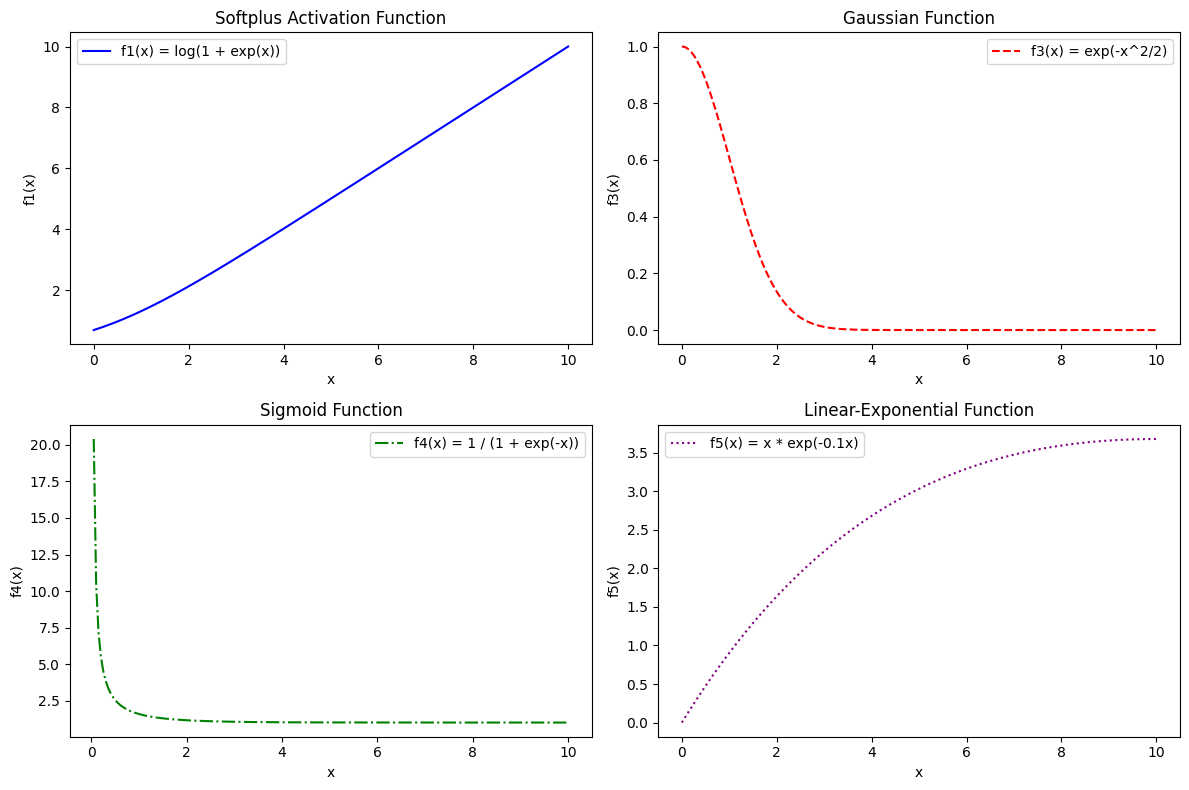

In [ ]:
# Calculate y values for each function
y1 = fx_1
y3 = fx_3
y4 = fx_4
y5 = fx_5
# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Plot y1
axs[0, 0].plot(x, y1, color='blue', linestyle='-', label='f1(x) = log(1 + exp(x))')
axs[0, 0].set_title('Softplus Activation Function')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('f1(x)')
axs[0, 0].legend()

# Plot y3
axs[0, 1].plot(x, y3, color='red', linestyle='--', label='f3(x) = exp(-x^2/2)')
axs[0, 1].set_title('Gaussian Function')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('f3(x)')
axs[0, 1].legend()

# Plot y4
axs[1, 0].plot(x, y4, color='green', linestyle='-.', label='f4(x) = 1 / (1 + exp(-x))')
axs[1, 0].set_title('Sigmoid Function')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('f4(x)')
axs[1, 0].legend()

# Plot y5
axs[1, 1].plot(x, y5, color='purple', linestyle=':', label='f5(x) = x * exp(-0.1x)')
axs[1, 1].set_title('Linear-Exponential Function')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('f5(x)')
axs[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

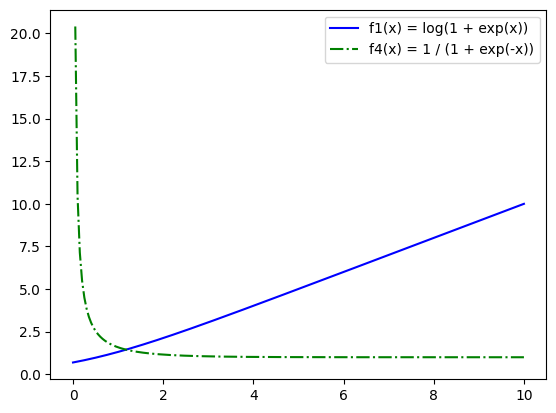

In [ ]:
plt.plot(x, y1, color='blue', linestyle='-', label='f1(x) = log(1 + exp(x))')
plt.plot(x, y4, color='green', linestyle='-.', label='f4(x) = 1 / (1 + exp(-x))')
plt.legend()

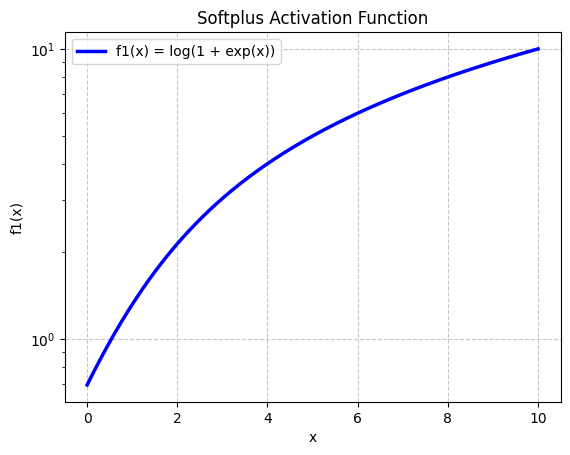

In [ ]:
plt.plot(x, y1, color='blue', linestyle='-',linewidth=2.5 , label='f1(x) = log(1 + exp(x))')
plt.yscale('log')
plt.title('Softplus Activation Function')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

In [ ]:
l = [54,56,58,60,61,62,62,63,64,65,65,70,71,72,72,74,75,75,76,77,78,86,87,88,89,89,89,93,95,98]
t= np.array(l)
print(t.mean())
print(t.std())

74.13333333333334
12.438470788467349


##3.1:  Implementation and visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_train = np.array([[1,1,2],[1,2,5],[1,3,7],[1,4,10],[1,5,12]])
X_test = np.array([[1,6,14],[1,7,16],[1,8,19]])

y_train = np.array([[6],[11],[16],[22],[27]])
y_test = np.array([[33],[38],[43]])


In [ ]:
# Normal Equation to compute the weight vector W
W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train #  @: Matrix multiplication operator.

In [ ]:
y_pred = X_test @ W

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred)**2)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))

In [ ]:
# Print the results
print("Weight Vector (W):\n", W)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Weight Vector (W):
 [[0.6       ]
 [4.46666667]
 [0.33333333]]
Mean Squared Error (MSE): 0.5407407407426713
Mean Absolute Error (MAE): 0.6888888888901997


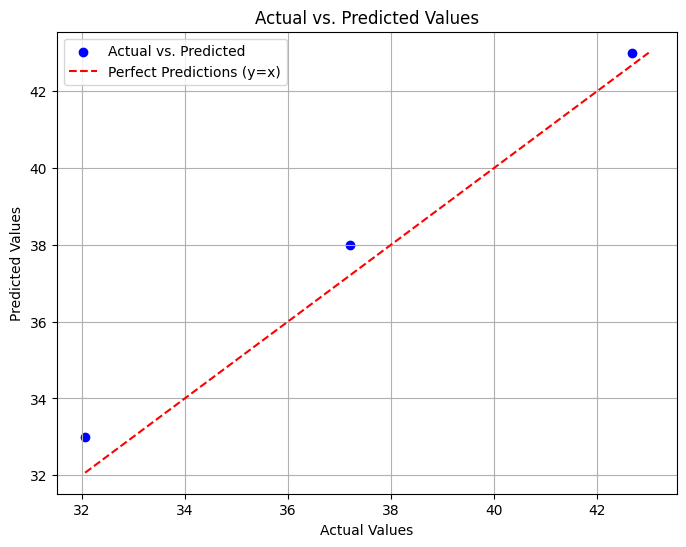

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, color='blue', label='Actual vs. Predicted')

# Add a dashed red line for perfect predictions (y = x)
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Predictions (y=x)')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

##4. Sales data Analysis

###4.1:  Array Manipulation and Broadcasting

In [ ]:
from google.colab import files


uploaded = files.upload()

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded["Sales_Data.csv"]))
print(df)


KeyError: 'Sales_Data.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         60 non-null     object 
 1   Category      60 non-null     object 
 2   Sales         60 non-null     int64  
 3   ProfitMargin  60 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [ ]:
sales = np.array(df['Sales'])
Norm_sales = (sales - np.min(sales))/(np.max(sales)-np.min(sales))
Norm_sales

array([0.16804788, 0.83839779, 0.07734807, 0.76289134, 0.        ,
       0.14709945, 0.53015654, 0.24263352, 0.91781768, 0.63858195,
       0.21915285, 0.44129834, 0.19452118, 0.59944751, 0.40722836,
       0.3218232 , 0.86556169, 0.63489871, 0.53061694, 0.44452118,
       0.62016575, 0.28383978, 0.31031308, 0.14848066, 0.69567219,
       0.87776243, 0.2051105 , 0.85474217, 0.00713628, 0.19912523,
       0.73941068, 0.84438306, 0.04765193, 0.88927256, 0.05732044,
       0.44475138, 0.56123389, 0.43669429, 0.06008287, 1.        ,
       0.49447514, 0.68347145, 0.68462247, 0.53499079, 0.15515654,
       0.60842541, 0.5893186 , 0.08563536, 0.17034991, 0.0174954 ,
       0.31169429, 0.16873849, 0.09967772, 0.37453959, 0.35635359,
       0.2138582 , 0.3664825 , 0.57435543, 0.33770718, 0.59000921])

In [ ]:
Pm = np.array(df['ProfitMargin'])
Z = (Pm - np.average(Pm))/Pm.std()
Z

array([-0.94252937,  0.50554034, -1.2349449 ,  0.51954827, -1.5133525 ,
        0.94328814, -0.94778235, -0.5205405 , -1.56062926, -0.56606627,
       -0.18435019, -0.56256429, -0.76918125,  0.58083296,  0.2148758 ,
       -1.42230096,  0.79795587, -1.35751429,  1.71372426,  1.24620961,
       -1.52911142, -0.74116539,  0.55106611, -1.46432475, -0.6781297 ,
        1.06060455,  0.2358877 , -0.9372764 , -0.2018601 ,  0.50904232,
       -1.2752177 ,  0.23938968,  0.30417635,  1.79602085, -0.618596  ,
       -1.00556506,  1.11838726, -0.55731131,  0.96780201, -1.32599644,
        0.69464739,  1.43706765, -1.36276726,  0.75768307,  0.969553  ,
        1.52111523,  1.07986545,  1.11488527, -1.44331285, -0.08804567,
       -0.87949369,  0.64386864,  0.38822393, -1.0966166 ,  1.06060455,
        1.71722624,  0.84873461,  0.60184485,  0.6333627 ,  0.01351182])

###4.2:  Boolean Indexing and Filtering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         60 non-null     object 
 1   Category      60 non-null     object 
 2   Sales         60 non-null     int64  
 3   ProfitMargin  60 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [ ]:
new_pm = np.array(df['ProfitMargin'][df['ProfitMargin'] > 10])
new_pm

array([16.94, 17.02, 19.44, 11.08, 10.82, 13.  , 10.84, 17.37, 15.28,
       18.61, 23.84, 21.17, 17.2 , 10.18, 20.11, 15.4 , 12.9 , 16.96,
       15.42, 15.79, 24.31, 10.52, 20.44, 10.87, 19.58, 18.02, 22.26,
       18.38, 19.59, 22.74, 20.22, 20.42, 13.55, 17.73, 16.27, 20.11,
       23.86, 18.9 , 17.49, 17.67, 14.13])

In [ ]:
df[df['Sales'] == np.max(df['Sales'])]

,Month,Category,Sales,ProfitMargin
39,Aug,Books,4974,6.48


In [ ]:
# Calculate total sales per month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Find the month with the highest total sales
month_with_highest_sales = monthly_sales.idxmax()

month_with_highest_sales

'Apr'

###4.3:  Aggregation and Statistical Computations

In [ ]:
sales.mean()

2489.4166666666665

In [ ]:
np.median(sales)

2463.0

In [ ]:
sales.std()

1191.1881784121638

In [ ]:
sales.var()


1418929.2763888887

In [ ]:
highest_sales_category = df.groupby("Category")["Sales"].mean().idxmax()
highest_sales_category

'Clothing'

###4.4:  Bar Chart - Sales by Category

In [ ]:
df

,Month,Category,Sales,ProfitMargin
0,Jan,Electronics,1360,8.67
1,Jan,Clothing,4272,16.94
2,Jan,Groceries,966,7.00
3,Jan,Furniture,3944,17.02
4,Jan,Books,630,5.41
5,Feb,Electronics,1269,19.44
6,Feb,Clothing,2933,8.64
7,Feb,Groceries,1684,11.08
8,Feb,Furniture,4617,5.14
9,Feb,Books,3404,10.82


Text(0.5, 1.0, 'Total Sales per category')

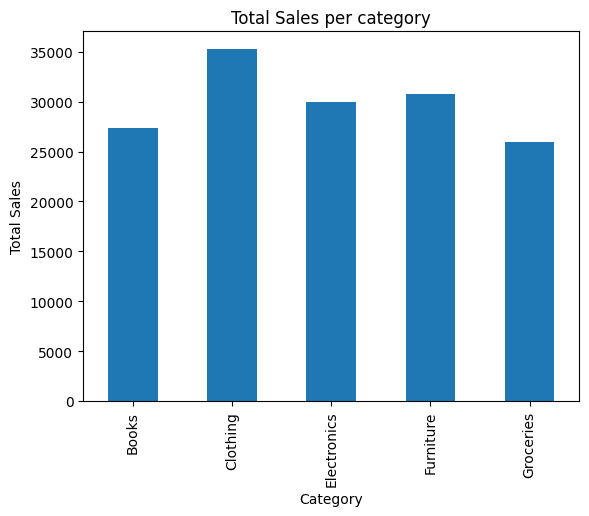

In [ ]:
df.groupby("Category")["Sales"].sum().plot(kind = 'bar')
plt.ylabel("Total Sales")
plt.title("Total Sales per category")

###4.5:  Line Plot - Sales Trend Over Time

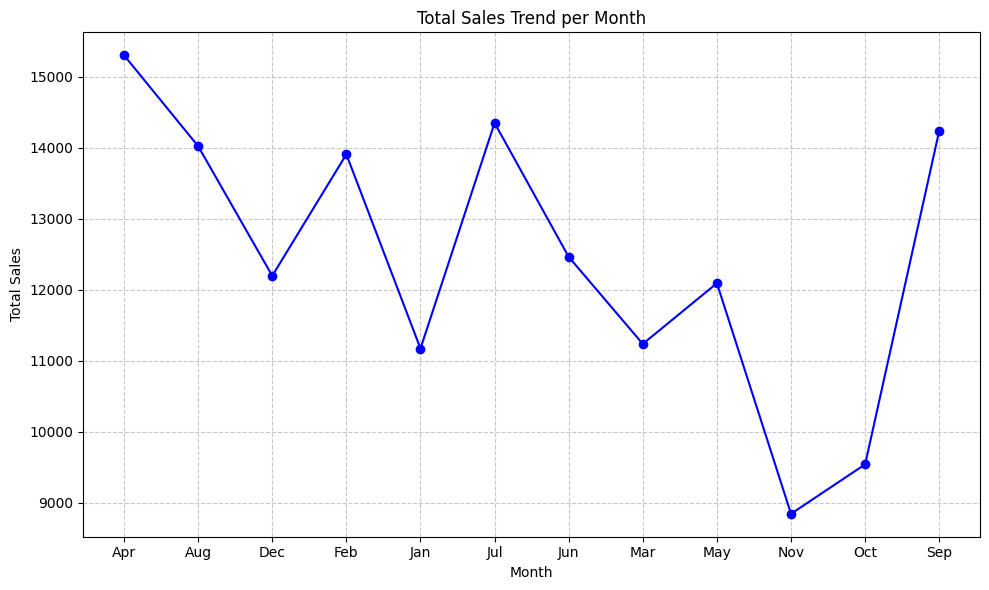

In [ ]:
# Calculate total sales per month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue')

# Customize the plot
plt.title('Total Sales Trend per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines

# Show the plot
plt.tight_layout()
plt.show()

###4.6 Advanced Plotting - Subplots

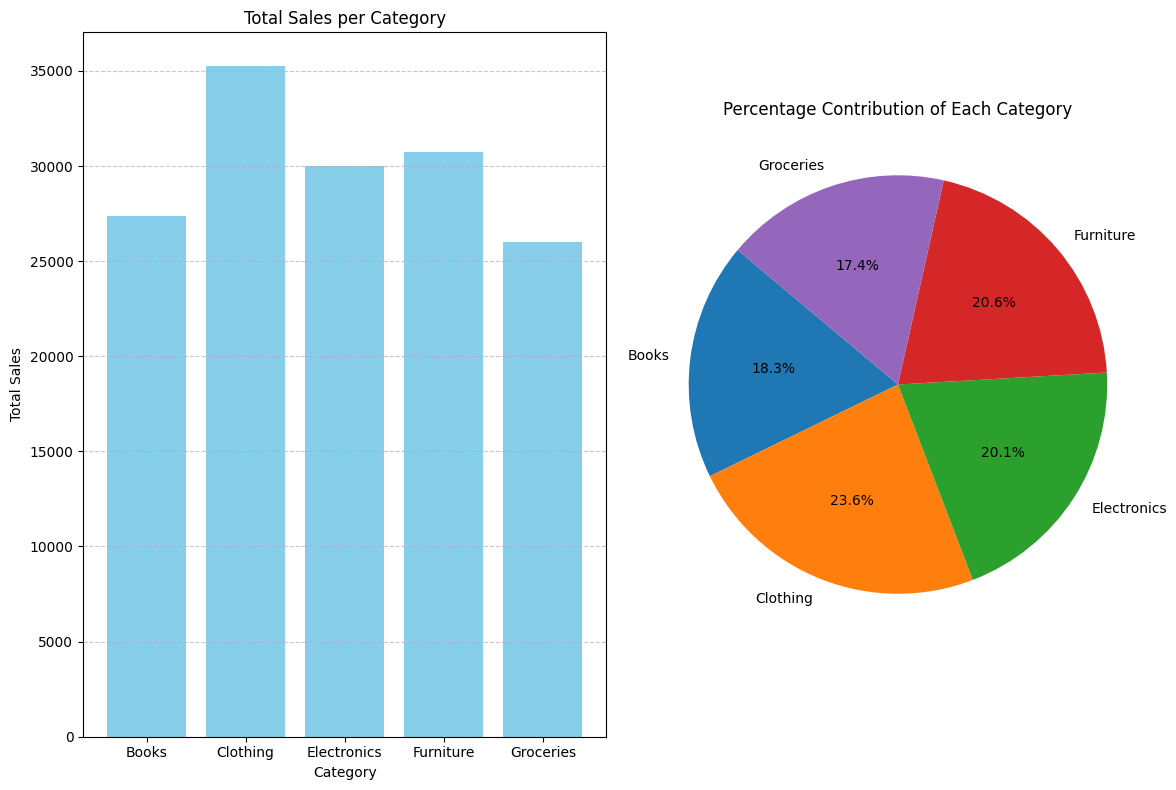

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
category_sales = df.groupby("Category")["Sales"].sum()

axes[0].bar(category_sales.index, category_sales.values, color='skyblue')
axes[0].set_title('Total Sales per Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Pie chart (subplot 2)
axes[1].pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Percentage Contribution of Each Category')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

###4.7:  Data-driven Styling - Scatter Plot

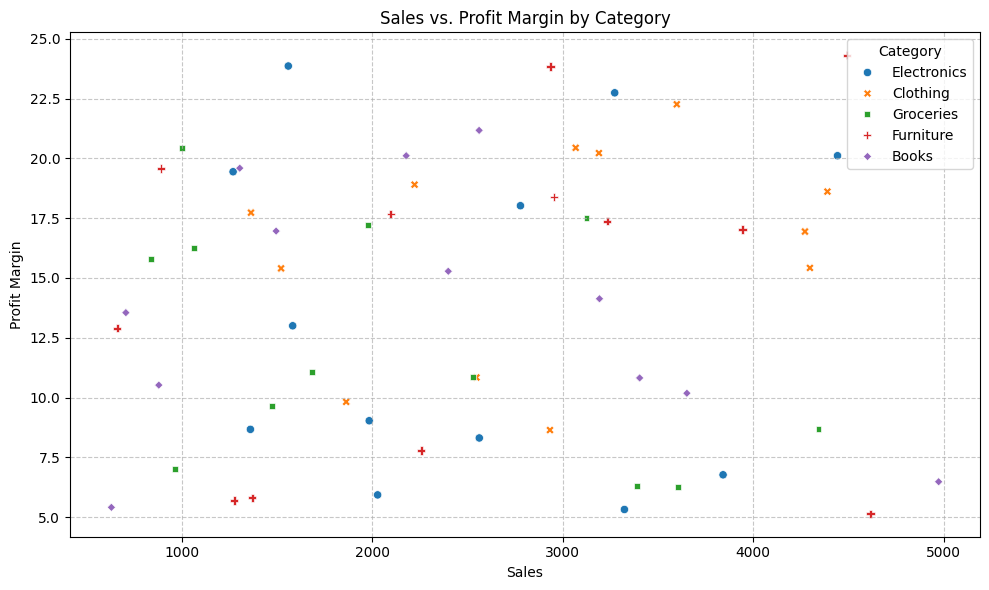

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.scatterplot(x= df['Sales'], y= df['ProfitMargin'], hue='Category', style='Category', data=df)

# Customize the plot
plt.title('Sales vs. Profit Margin by Category')
plt.xlabel('Sales')
plt.ylabel('Profit Margin')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Category')

# Show plot
plt.tight_layout()
plt.show()

##Logistic Regression

In [2]:
import numpy as np

# Training dataset
#The first column of all 1's in X_train represents the bias term in a linear model.
X_train = np.array([
    [1, 0.5, 1.5],
    [1, 1, 1],
    [1, 1.5, 0.5],
    [1, 3, 2.5],
    [1, 2, 3],
    [1, 3, 3]
])

y_train = np.array([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1]
])

# Test dataset
X_test = np.array([
    [1, 0.8, 1.2],
    [1, 2.2, 2.8],
    [1, 3.1, 2.7]
])

# Weight vector
W = np.array([
    [-5.76],
    [1.43],
    [1.90]
])

# Print the datasets and weight vector (optional)
print("X_train:\n", X_train)
print("\ny_train:\n", y_train)
print("\nX_test:\n", X_test)
print("\nW:\n", W)

X_train:
 [[1.  0.5 1.5]
 [1.  1.  1. ]
 [1.  1.5 0.5]
 [1.  3.  2.5]
 [1.  2.  3. ]
 [1.  3.  3. ]]

y_train:
 [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]

X_test:
 [[1.  0.8 1.2]
 [1.  2.2 2.8]
 [1.  3.1 2.7]]

W:
 [[-5.76]
 [ 1.43]
 [ 1.9 ]]


###5.1 Compute the probabilities

In [3]:
z = np.matmul(X_train,W)
y_hat_probs = 1/(1+np.exp(z))
y_hat_probs

array([[0.89979961],
       [0.91908653],
       [0.93492951],
       [0.03626372],
       [0.05732418],
       [0.01434366]])

###5.2:  Compute the predicted class labels

In [4]:
# Assign class labels based on the probabilities
y_hat_labels = np.where(y_hat_probs >= 0.5, 1, 0)
y_hat_labels

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0]])

###5.3:  Apply the model to the test set

In [5]:
# 1. Compute z_test = X_test @ W
z_test = X_test @ W

# 2. Compute probabilities using the sigmoid function
y_test_probs = 1 / (1 + np.exp(-z_test))

# 3. Assign predicted class labels based on the threshold 0.5
y_test_labels = np.where(y_test_probs >= 0.5, 1, 0)

# Print the results
print("z_test:\n", z_test)
print("\ny_test_probs:\n", y_test_probs)
print("\ny_test_labels:\n", y_test_labels)

z_test:
 [[-2.336]
 [ 2.706]
 [ 3.803]]

y_test_probs:
 [[0.08818502]
 [0.93737976]
 [0.97818284]]

y_test_labels:
 [[0]
 [1]
 [1]]


### 5.4:  Visualization using Matplotlib

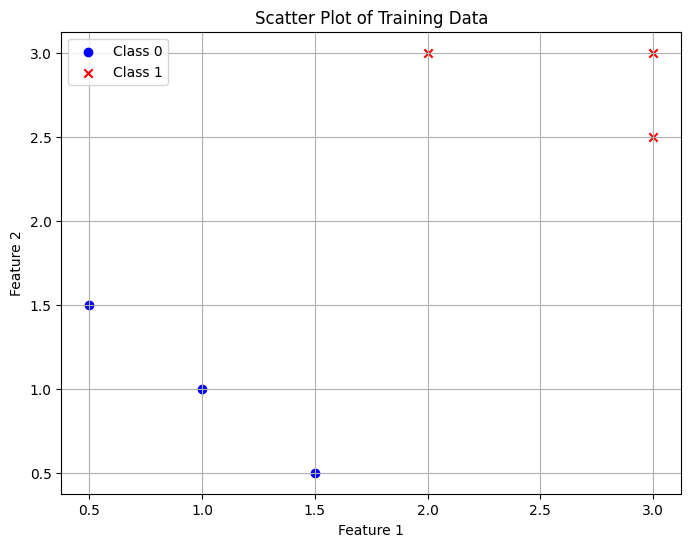

In [16]:
import matplotlib.pyplot as plt

# Extract features (exclude the bias term)
feature1 = X_train[:, 1]
feature2 = X_train[:, 2]

# Create scatter plot
plt.figure(figsize=(8, 6))

# Separate points by class for different colors
class0_indices = np.where(y_train[:, 0] == 0)[0]
class1_indices = np.where(y_train[:, 0] == 1)[0]

plt.scatter(feature1[class0_indices], feature2[class0_indices], color='blue', label='Class 0', marker='o')
plt.scatter(feature1[class1_indices], feature2[class1_indices], color='red', label='Class 1', marker='x')

# Customize plot
plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()